# Load your Data

In [94]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [118]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# Split your Data
Your data needs to be split into features(X) and labels(Y) to perform supervised learning. 

In [120]:
features = dataset.data[:,:4]
labels = dataset.target
feature_names=dataset.feature_names[:4]
print(feature_names)
print(dataset.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area']
['malignant' 'benign']


# Visualize Your Data(EDA)

In [96]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(features, columns=feature_names)
df["class"] = pd.Series(dataset.target)

In [97]:
len(df)

569

In [98]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,class
0,17.99,10.38,122.80,1001.0,0
1,20.57,17.77,132.90,1326.0,0
2,19.69,21.25,130.00,1203.0,0
3,11.42,20.38,77.58,386.1,0
4,20.29,14.34,135.10,1297.0,0


In [99]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,class
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.000000
50%,13.370000,18.840000,86.240000,551.100000,1.000000
75%,15.780000,21.800000,104.100000,782.700000,1.000000
max,28.110000,39.280000,188.500000,2501.000000,1.000000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mean radius     569 non-null    float64
 1   mean texture    569 non-null    float64
 2   mean perimeter  569 non-null    float64
 3   mean area       569 non-null    float64
 4   class           569 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 22.4 KB


array([[<AxesSubplot:title={'center':'mean radius'}>,
        <AxesSubplot:title={'center':'mean texture'}>],
       [<AxesSubplot:title={'center':'mean perimeter'}>,
        <AxesSubplot:title={'center':'mean area'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

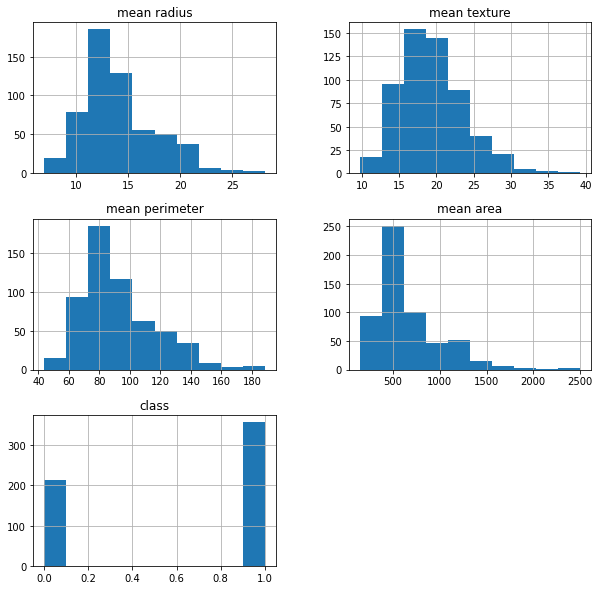

In [101]:
df.hist(figsize=(10,10))

[Text(0, 0, 'malignant'), Text(1, 0, 'benign')]

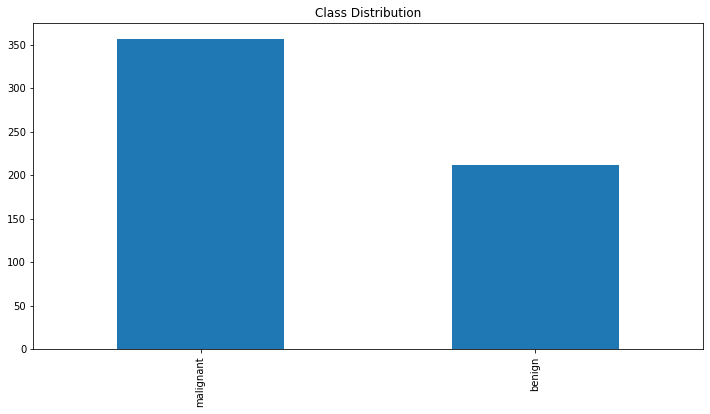

In [121]:
ax=df['class'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
ax.set_xticklabels(dataset.target_names)

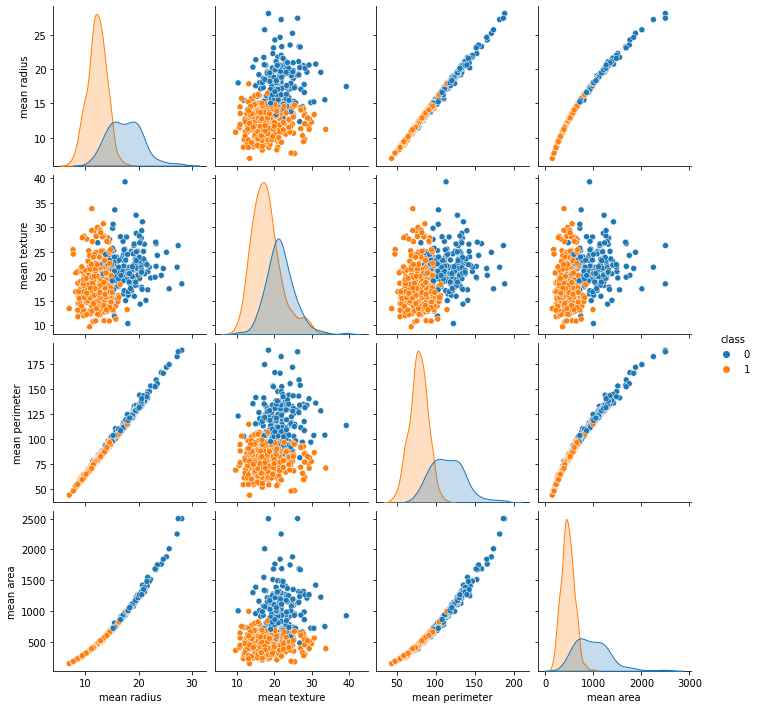

In [103]:
sns.pairplot(df, hue="class")

# Split Your Data into Training and Testing
Splitting your data into training and testing helps you gauge its validity in the real world. 

In [104]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

# Classical Machine Learning


In [105]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features,train_labels)


KNeighborsClassifier(n_neighbors=3)

In [106]:
train_score_knn = knn.score(train_features, train_labels)
test_score_knn = knn.score(test_features, test_labels)

print(f"Classical knn on the training dataset: {train_score_knn:.2f}")
print(f"Classical knn on the test dataset:     {test_score_knn:.2f}")

Classical knn on the training dataset: 0.93
Classical knn on the test dataset:     0.89


/Users/jesherjoshua/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jesherjoshua/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

# Let's Go Quantum
# Bits -> Qubits

Number of features: 4


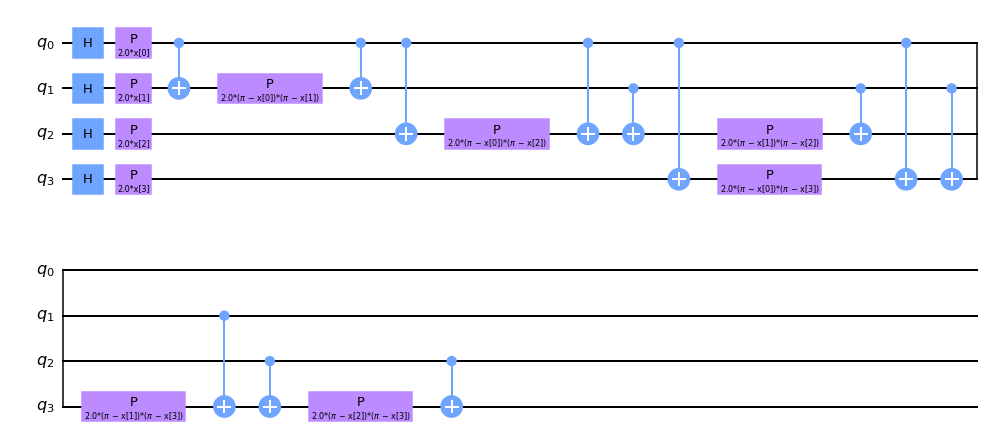

In [107]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]
print(f'Number of features: {num_features}')
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

# Your Weights and Biases
 The ansatz circuit is a direct analog to the layers in classical neural networks. It has a set of tunable parameters or weights. The weights are optimized such that they minimize an objective function. This objective function characterizes the distance between the predictions and known labeled data. A parameterized quantum circuit is also called a parameterized trial state, variational form, or ansatz.

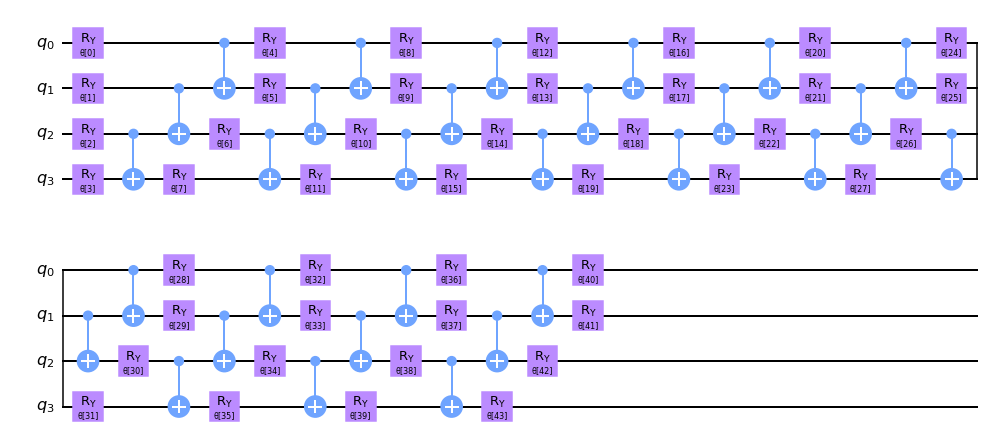

In [108]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=10)
ansatz.decompose().draw(output="mpl", fold=20)

# Define the Optimizer

In [109]:
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=10)

# Define your Quantum Backend
For this example we will just be using the simulator

In [110]:
from qiskit.primitives import Sampler

sampler = Sampler()

# Defining Your Plotting Function

In [111]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

# Let's Train....

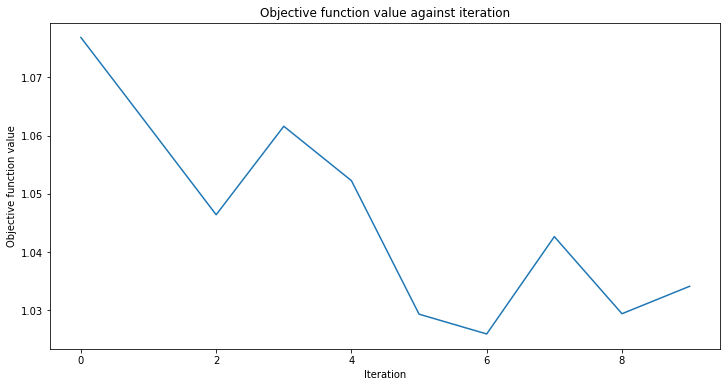

Training time: 33 seconds


In [112]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

# Let's See Some Results

In [113]:
train_score_vqc = vqc.score(train_features, train_labels)
test_score_vqc = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_vqc:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_vqc:.2f}")

Quantum VQC on the training dataset: 0.51
Quantum VQC on the test dataset:     0.48


In [114]:
df_results=pd.DataFrame({
    "acc":[train_score_vqc,train_score_knn,test_score_vqc,test_score_knn],
    "type":['Train','Train','Test','Test'],
    "method":['VQC','KNN','VQC','KNN']
})

In [115]:
df_results

,acc,type,method
0,0.509890,Train,VQC
1,0.929670,Train,KNN
2,0.482456,Test,VQC
3,0.885965,Test,KNN


In [116]:
df_results.columns

Index(['acc', 'type', 'method'], dtype='object')

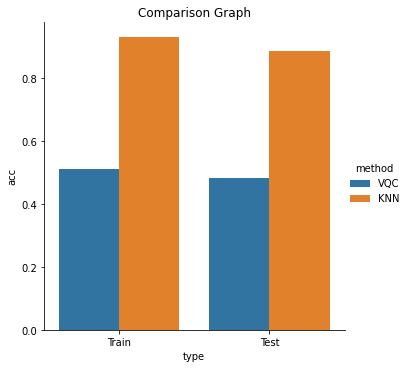

In [117]:
sns.catplot(data=df_results,x='type',y='acc',hue='method',kind='bar').set(title='Comparison Graph')
